In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Sintonia para todas as variáveis
# proc_path = '../dist6_22/proc.csv'
# alm_path = '../dist6_22/alm_seq.csv'
# threshold_path = '../dist6_22/threshold.csv'

# Sintonia Gao
# proc_path = '../dist6_gao/proc.csv'
# alm_path = '../dist6_gao/alm_seq.csv'
# threshold_path = '../dist6_gao/threshold.csv'

# Sintonia variáveis selecionadas
# proc_path = '../dist6_key_var/proc.csv'
# alm_path = '../dist6_key_var/alm_seq.csv'
# threshold_path = '../dist6_key_var/threshold.csv'

# 2/8
# proc_path = '../dist6_data/proc_corr_dist6.csv'
# alm_path = '../dist6_data/alm_seq_corr_dist6.csv'
# threshold_path = '../dist6_data/corr_threshold_MultiLoop_mode1_73_dist6.csv'

# .5 / 2.5
proc_path = '../dist6_3horas_sig/proc.csv'
alm_path = '../dist6_3horas_sig/alm_seq.csv'
threshold_path = '../dist6_3horas_sig/threshold.csv'

In [3]:
proc_df = pd.read_csv(proc_path, index_col='tout', usecols=['tout']+["xmeas%02d" % x for x in  [1, 2, 3, 8, 9, 21]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

,xmeas01,xmeas02,xmeas03,xmeas08,xmeas09,xmeas21
tout,,,,,,
2018-03-14 16:14:42.157200,0.271033,3649.739415,4451.320791,64.995825,122.898796,102.480028
2018-03-14 16:15:18.157200,0.000965,3623.428806,4462.360219,64.782059,122.910451,102.463577
2018-03-14 16:15:54.157200,-0.000553,3649.856033,4459.992328,65.640652,122.875696,102.496571
2018-03-14 16:16:30.157200,0.001179,3640.289227,4468.936940,64.547201,122.868379,102.545781
2018-03-14 16:17:06.157200,-0.000089,3654.615228,4444.053549,65.162617,122.863084,102.552682


In [4]:
threshold_df = pd.read_csv(threshold_path, index_col='proc_var')
threshold_df = threshold_df.loc[[1,2,3,8,9,21]]
threshold_df.head(6)

,limit,type,dead_band,delay_time
proc_var,,,,
1,0.249111,LOW,NaN,NaN
1,0.284437,HIGH,NaN,NaN
2,3597.394823,LOW,NaN,NaN
2,3711.109968,HIGH,NaN,NaN
3,4371.271459,LOW,NaN,NaN
3,4514.069121,HIGH,NaN,NaN


In [5]:
#Analysis for 3sigma method
threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
threshold_sigma_df = threshold_sigma_df.loc[[1,2,3,8,9,21]]

In [6]:
alm_df = pd.read_csv(alm_path, index_col='tout', usecols=['tout']+["xmeas%02d_low" % x for x in  [1, 2, 3, 8, 9, 21]]+["xmeas%02d_high" % x for x in  [1, 2, 3, 8, 9, 21]])
alm_df.index = proc_df.index
alm_df.head()

,xmeas01_low,xmeas02_low,xmeas03_low,xmeas08_low,xmeas09_low,xmeas21_low,xmeas01_high,xmeas02_high,xmeas03_high,xmeas08_high,xmeas09_high,xmeas21_high
tout,,,,,,,,,,,,
2018-03-14 16:14:42.157200,0,0,0,0,0,0,0,0,0,0,0,0
2018-03-14 16:15:18.157200,1,0,0,0,0,0,0,0,0,0,0,0
2018-03-14 16:15:54.157200,1,0,0,0,0,0,0,0,0,0,0,0
2018-03-14 16:16:30.157200,1,0,0,0,0,0,0,0,0,0,0,1
2018-03-14 16:17:06.157200,1,0,0,0,1,0,0,0,0,0,0,1


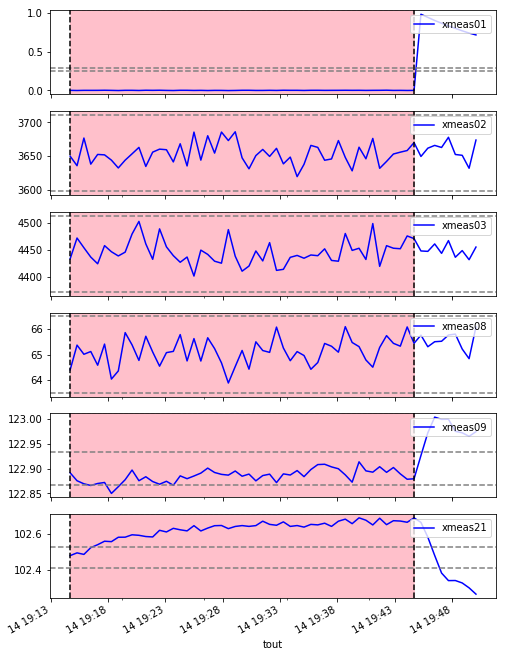

In [7]:
axes = proc_df.iloc[300:360].plot(subplots=True, figsize=(8, 12), color='blue', scaley='linear')
var_names = ['xmeas%02d' % x for x in [1,2,3,8,9,21]]
alm_diff_df = alm_df.iloc[300:360].diff()
for i, ax in enumerate(axes):
#     ax.axhline(y=threshold_df.iloc[i].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2)].limit, color="gray", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
#     diff_high = alm_diff_df[var_names[i]+'_high']
#     begin_high = alm_diff_df[diff_high > 0].index
#     end_high = alm_diff_df[diff_high < 0].index
    
#     if begin_high.size > end_high.size:
#         end_high = np.append(end_high, a.size)
#     elif begin_high.size < end_high.size:
#         begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].name) 
#     elif begin_high.size == 0 and end_high.size == 0:
#         begin_high = []
#         end_high = []
#     elif np.all(begin_high > end_high):
#         begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].name)
#         end_high = np.append(end_high, a.size)
    
#     for b, e in zip(begin_high, end_high):
#         ax.axvspan(b, e, color="red")
        
        
#     diff_low = alm_diff_df[var_names[i]+'_low']
#     begin_low = alm_diff_df[diff_low > 0].index
#     end_low = alm_diff_df[diff_low < 0].index
    
#     if begin_low.size > end_low.size:
#         end_low = np.append(end_low, a.size)
#     elif begin_low.size < end_low.size:
#         begin_low = np.insert(begin_low, 0, alm_diff_df.iloc[0].name) 
#     elif begin_low.size == 0 and end_low.size == 0:
#         begin_low = []
#         end_low = []
#     elif np.all(begin_low > end_low):
#         print(begin_low)
#         begin_low = np.insert(begin_low, 0, alm_diff_df.iloc[0].name)
#         end_low = np.append(end_low, a.size)
    
#     for b, e in zip(begin_low, end_low):
#         ax.axvspan(b, e, color="yellow")
#     ax.axvline(x=proc_df.index[200], color="black", ls='--')
    

    ax.axvspan(proc_df.index[300], proc_df.index[350], color="pink", ls='--')
    ax.axvline(x=proc_df.index[300], color="black", ls='--')
    ax.axvline(x=proc_df.index[350], color="black", ls='--')
    ax.legend(loc='upper right')
plt.show()

In [8]:
# begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].index)
alm_diff_df.iloc[0].name

Timestamp('2018-03-14 19:14:42.157200')

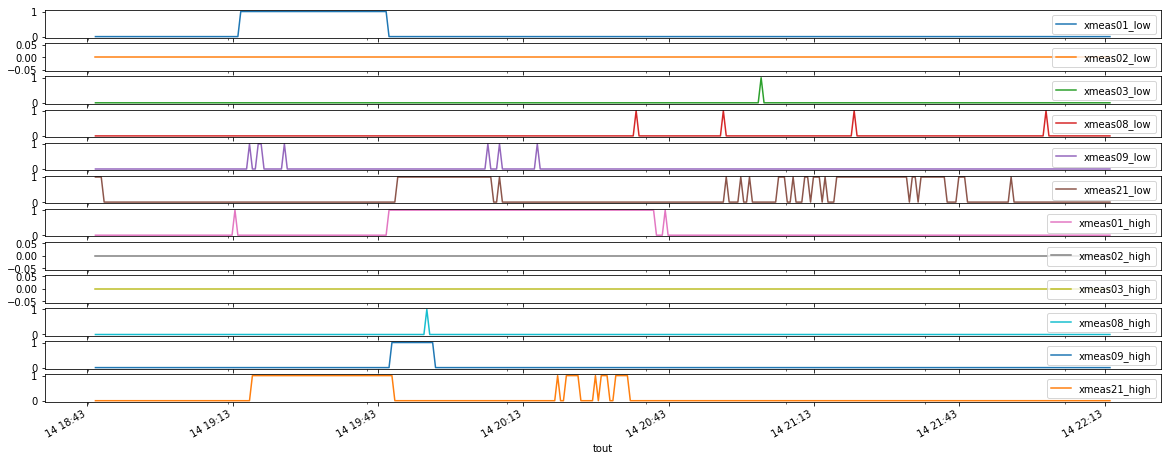

In [9]:
# alm_df.rolling(10).mean().round().iloc[0:2600].plot(subplots=True, figsize=(20, 8))
alm_df.iloc[250:600].plot(subplots=True, figsize=(20, 8))
plt.show()

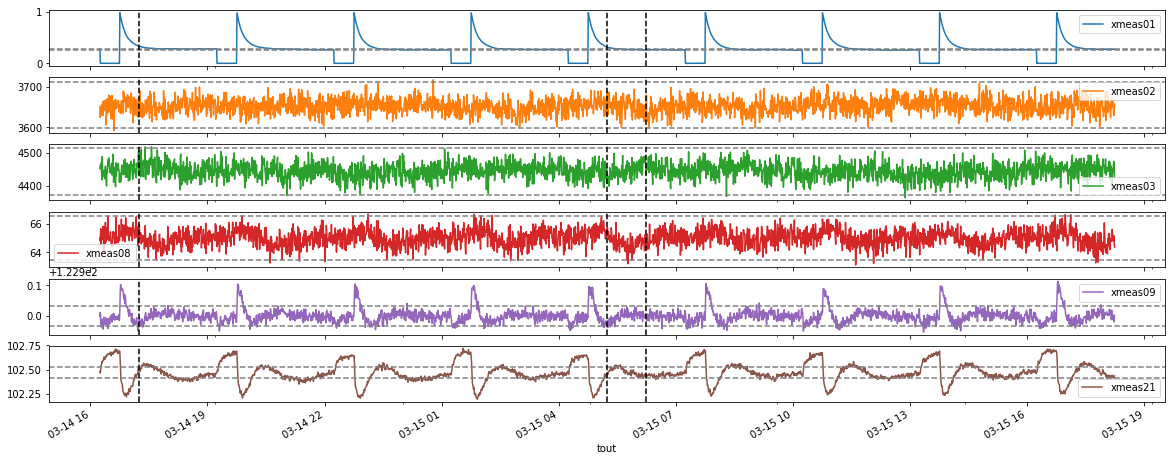

In [10]:
#Plot vars 3sigma method
proc_df = pd.read_csv(proc_path, index_col='tout', usecols=['tout']+["xmeas%02d" % x for x in  [1,2,3,8,9,21]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
threshold_sigma_df = threshold_sigma_df.loc[[1,2,3,8,9,21]]

axes = proc_df.iloc[0:2600].plot(subplots=True, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.axhline(y=threshold_sigma_df.iloc[i*(2)].limit, color="gray", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
    ax.axvline(x=proc_df.index[100], color="black", ls='--')
    ax.axvline(x=proc_df.index[1300], color="black", ls='--')
    ax.axvline(x=proc_df.index[1400], color="black", ls='--')
plt.show()